In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
fake_df=pd.read_csv('fake.csv')
true_df=pd.read_csv('true.csv')

In [ ]:
fake_df.shape,true_df.shape

((23481, 4), (21417, 4))

In [ ]:
fake_df.isnull().sum(),true_df.isnull().sum()

(title      0
 text       0
 subject    0
 date       0
 dtype: int64,
 title      0
 text       0
 subject    0
 date       0
 dtype: int64)

In [ ]:
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_df[fake_df.duplicated()].shape,true_df[true_df.duplicated()].shape

((3, 4), (206, 4))

In [ ]:
fake_df=fake_df.drop_duplicates()
true_df=true_df.drop_duplicates()

print(fake_df.shape,true_df.shape)
print(fake_df[fake_df.duplicated()].shape,true_df[true_df.duplicated()].shape)

(23478, 4) (21211, 4)
(0, 4) (0, 4)


In [ ]:
fake_df=fake_df.drop(columns=['date'])
true_df=true_df.drop(columns=['date'])

In [ ]:
fake_df['title']=fake_df['title'].astype(str)
fake_df['text']=fake_df['text'].astype(str)
true_df['title']=true_df['title'].astype(str)
true_df['text']=true_df['text'].astype(str)

In [ ]:
fake_df['label']=0
true_df['label']=1

In [ ]:
fake_df.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0


In [ ]:
true_df.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
all_text_df=pd.concat([fake_df['text'],true_df['text']],ignore_index=True)
all_text_df.shape

(44689,)

In [ ]:
nltk_stop_words=set(stopwords.words('english'))
nltk_lemmatizer=WordNetLemmatizer()

def pre_process_text(text:str='',ignore_words=nltk_stop_words,lemmatizer=nltk_lemmatizer)->list:
    tokens=word_tokenize(text.lower().strip())
    tokens=[word for word in tokens if word not in ignore_words]
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return tokens

def get_word_freq(df)->dict:
  all_tokens=[pre_process_text(text) for text in df]
  all_tokens_flat=[token for sublist in all_tokens for token in sublist]
  word_freq=Counter(all_tokens_flat)
  return word_freq

In [ ]:
# for collection
word_freq_collection=get_word_freq(df=all_text_df)

# for real news
word_freq_real=get_word_freq(df=true_df['text'])

# for fake news
word_freq_fake=get_word_freq(df=fake_df['text'])

# filter only top 100 most common words
top_100_collection=word_freq_collection.most_common(100)
top_100_real=word_freq_real.most_common(100)
top_100_fake=word_freq_fake.most_common(100)

In [ ]:
from wordcloud import WordCloud

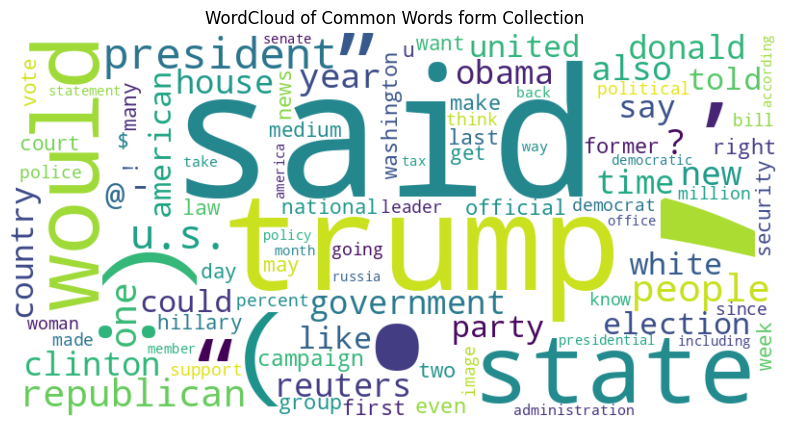

In [ ]:
# visualize common words using WordCloud for collection
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_collection))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Collection')
plt.show()

# wordcloud.to_file("top_100_collection.jpeg")

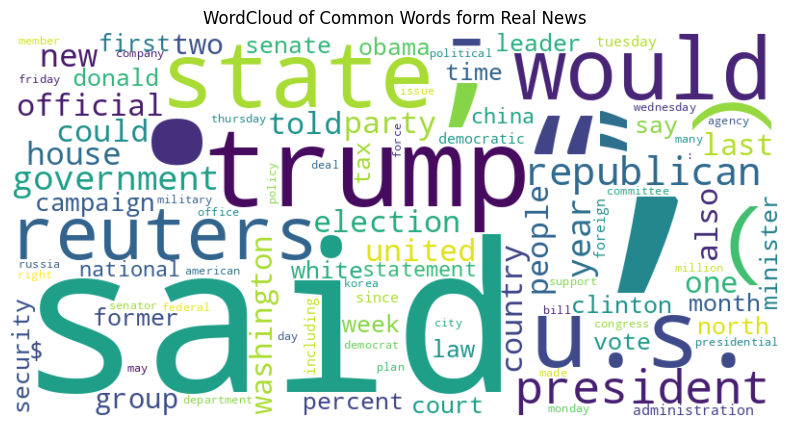

In [ ]:
# visualize common words using WordCloud for real news
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_real))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Real News')
plt.show()

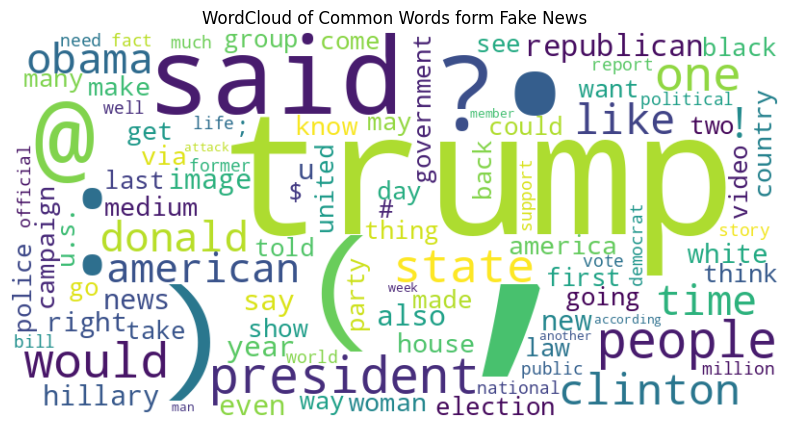

In [ ]:
# visualize common words using WordCloud for fake news
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_fake))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Fake News')
plt.show()

In [ ]:
all_news_df=pd.concat([fake_df,true_df],ignore_index=True)
all_news_df.shape

(44689, 4)

In [ ]:
all_news_df['subject'].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
fake_df['subject'].value_counts()

News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [ ]:
true_df['subject'].value_counts()

politicsNews    11220
worldnews        9991
Name: subject, dtype: int64

In [ ]:
true_df.head(2)

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1


In [ ]:
true_df['all_text']=true_df['title']+' '+true_df['text']
fake_df['all_text']=fake_df['title']+' '+fake_df['text']
all_news_df['all_text']=all_news_df['title']+' '+all_news_df['text']

true_df=true_df[['subject','label','all_text']]
fake_df=fake_df[['subject','label','all_text']]
all_news_df=all_news_df[['subject','label','all_text']]

In [ ]:
true_df.head(2)

,subject,label,all_text
0,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,politicsNews,1,U.S. military to accept transgender recruits o...


In [ ]:
true_df['all_text'].iloc[0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [ ]:
fake_df['all_text'].iloc[0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this 

In [ ]:
def pre_process_all_text(text:str='',ignore_words=nltk_stop_words,lemmatizer=nltk_lemmatizer)->list:
    tokens=word_tokenize(text.lower().strip())
    tokens=[word for word in tokens if word not in ignore_words]
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    tokens=' '.join(tokens)
    return tokens

In [ ]:
true_df['all_text']=true_df['all_text'].apply(pre_process_all_text)

In [ ]:
fake_df['all_text']=fake_df['all_text'].apply(pre_process_all_text)

In [ ]:
all_news_df['all_text']=all_news_df['all_text'].apply(pre_process_all_text)

In [ ]:
true_df['all_text'].iloc[0]

'u.s. budget fight loom , republican flip fiscal script washington ( reuters ) - head conservative republican faction u.s. congress , voted month huge expansion national debt pay tax cut , called “ fiscal conservative ” sunday urged budget restraint 2018. keeping sharp pivot way among republican , u.s. representative mark meadow , speaking cbs ’ “ face nation , ” drew hard line federal spending , lawmaker bracing battle january . return holiday wednesday , lawmaker begin trying pas federal budget fight likely linked issue , immigration policy , even november congressional election campaign approach republican seek keep control congress . president donald trump republican want big budget increase military spending , democrat also want proportional increase non-defense “ discretionary ” spending program support education , scientific research , infrastructure , public health environmental protection . “ ( trump ) administration already willing say : ‘ ’ going increase non-defense discret

In [ ]:
fake_df['all_text'].iloc[0]

'donald trump sends embarrassing new year ’ eve message ; disturbing donald trump wish american happy new year leave . instead , give shout enemy , hater dishonest fake news medium . former reality show star one job . country rapidly grows stronger smarter , want wish friend , supporter , enemy , hater , even dishonest fake news medium , happy healthy new year , president angry pant tweeted . 2018 great year america ! country rapidly grows stronger smarter , want wish friend , supporter , enemy , hater , even dishonest fake news medium , happy healthy new year . 2018 great year america ! donald j. trump ( @ realdonaldtrump ) december 31 , 2017trump tweet went welll expect.what kind president sends new year greeting like despicable , petty , infantile gibberish ? trump ! lack decency even allow rise gutter long enough wish american citizen happy new year ! bishop talbert swan ( @ talbertswan ) december 31 , 2017no one like calvin ( @ calvinstowell ) december 31 , 2017your impeachment wo

In [ ]:
all_news_df.head()

,subject,label,all_text
0,News,0,donald trump sends embarrassing new year ’ eve...
1,News,0,drunk bragging trump staffer started russian c...
2,News,0,sheriff david clarke becomes internet joke thr...
3,News,0,trump obsessed even obama ’ name coded website...
4,News,0,pope francis called donald trump christmas spe...


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(all_news_df['all_text'],all_news_df['label'],test_size=0.3,random_state=1234)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# extraction of features using different methods

# 1. Term Frequency (TF - without IDF)
tf_vectorizer=TfidfVectorizer(use_idf=False,max_features=2000)
X_train_tf=tf_vectorizer.fit_transform(X_train)
X_test_tf=tf_vectorizer.transform(X_test)

# 2. TF-IDF (Term Frequency & Inverse Document Frequency)
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=2000)
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)

# 3. Count Vectorizer (Bag of words method)
count_vectorizer=CountVectorizer(max_features=2000)
X_train_count=count_vectorizer.fit_transform(X_train)
X_test_count=count_vectorizer.transform(X_test)

# 4. Count Vectorizer (bigrams only)
count_vectorizer_bigram=CountVectorizer(ngram_range=(2,2),max_features=2000)
X_train_count_bigram=count_vectorizer_bigram.fit_transform(X_train)
X_test_count_bigram=count_vectorizer_bigram.transform(X_test)

# 5. Count Vectorizer (trigrams only)
count_vectorizer_trigram=CountVectorizer(ngram_range=(3,3),max_features=2000)
X_train_count_trigram=count_vectorizer_trigram.fit_transform(X_train)
X_test_count_trigram=count_vectorizer_trigram.transform(X_test)

In [ ]:
print(f"{X_train.shape=},\n,{X_test.shape=},\n,{y_train.shape=},\n,{y_test.shape=},\n,{X_train_tf.shape=},\n,{X_test_tf.shape=},\n,{X_train_tfidf.shape=},\n,{X_test_tfidf.shape=},\n,{X_train_count.shape=},\n,{X_test_count.shape=},\n,{X_train_count_bigram.shape=},\n,{X_test_count_bigram.shape=},\n,{X_train_count_trigram.shape=},\n,{X_test_count_trigram.shape=}")

X_train.shape=(31282,),
,X_test.shape=(13407,),
,y_train.shape=(31282,),
,y_test.shape=(13407,),
,X_train_tf.shape=(31282, 2000),
,X_test_tf.shape=(13407, 2000),
,X_train_tfidf.shape=(31282, 2000),
,X_test_tfidf.shape=(13407, 2000),
,X_train_count.shape=(31282, 2000),
,X_test_count.shape=(13407, 2000),
,X_train_count_bigram.shape=(31282, 2000),
,X_test_count_bigram.shape=(13407, 2000),
,X_train_count_trigram.shape=(31282, 2000),
,X_test_count_trigram.shape=(13407, 2000)


In [ ]:
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py
from tabulate import tabulate

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import Perceptron,RidgeClassifier,PassiveAggressiveClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
def get_evaluation_metrics(true_pred,test_pred):
  precision=precision_score(true_pred,test_pred)
  recall=recall_score(true_pred,test_pred)
  accuracy=accuracy_score(true_pred,test_pred)
  return precision,recall,accuracy

In [ ]:
# training different models

nb_model=MultinomialNB()
logistic_model=LogisticRegression()
ridge_classifier_model=RidgeClassifier()
passive_aggressive_model=PassiveAggressiveClassifier()
nearest_centroid_model=NearestCentroid()
sgd_model=SGDClassifier()
rf_model=RandomForestClassifier()
adaboost_model=AdaBoostClassifier()
gradient_boosting_model=GradientBoostingClassifier()

model_names=list()
feature_names=list()
precs=list()
recal=list()
acc=list()

for model1,model_name in [
    (nb_model,"Naive Bayes"),
    (logistic_model,"Logistic Regression"),
    (ridge_classifier_model,"Ridge Classifier"),
    (passive_aggressive_model,"Passive Aggressive Classifier"),
    (nearest_centroid_model,"Nearest Centroid"),
    (sgd_model,"Stochastic Gradient Descent"),
    (rf_model,"Random Forest"),
    (adaboost_model,"Adaptive Boosting"),
    (gradient_boosting_model,"Gradient Boosting"),
    ]:
  for train_case,test_case,feature_name in [
    (X_train_tf,X_test_tf,"Term Frequency (TF - without IDF)"),
    (X_train_tfidf,X_test_tfidf,"TF-IDF (Term Frequency & Inverse Document Frequency)"),
    (X_train_count,X_test_count,"Count Vectorizer (Bag of words method)"),
    (X_train_count_bigram,X_test_count_bigram,"Count Vectorizer (bigrams only)"),
    (X_train_count_trigram,X_test_count_trigram,"Count Vectorizer (trigrams only)"),
  ]:
    print(model1,feature_name)
    model1.fit(train_case,y_train)
    p,r,a=get_evaluation_metrics(true_pred=y_test,test_pred=model1.predict(test_case))
    model_names.append(model_name)
    feature_names.append(feature_name)
    precs.append(p)
    recal.append(r)
    acc.append(a)

MultinomialNB() Term Frequency (TF - without IDF)
MultinomialNB() TF-IDF (Term Frequency & Inverse Document Frequency)
MultinomialNB() Count Vectorizer (Bag of words method)
MultinomialNB() Count Vectorizer (bigrams only)
MultinomialNB() Count Vectorizer (trigrams only)
LogisticRegression() Term Frequency (TF - without IDF)
LogisticRegression() TF-IDF (Term Frequency & Inverse Document Frequency)
LogisticRegression() Count Vectorizer (Bag of words method)
LogisticRegression() Count Vectorizer (bigrams only)
LogisticRegression() Count Vectorizer (trigrams only)
RidgeClassifier() Term Frequency (TF - without IDF)
RidgeClassifier() TF-IDF (Term Frequency & Inverse Document Frequency)
RidgeClassifier() Count Vectorizer (Bag of words method)
RidgeClassifier() Count Vectorizer (bigrams only)
RidgeClassifier() Count Vectorizer (trigrams only)
PassiveAggressiveClassifier() Term Frequency (TF - without IDF)
PassiveAggressiveClassifier() TF-IDF (Term Frequency & Inverse Document Frequency)
Passi

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          "ML Model":model_names,
          "Feature":feature_names,
          "Precision":precs,
          "Recall":recal,
          "Accuracy":acc,
          }
    ).sort_values(by=['Precision','Recall','Accuracy'],ascending=[False,False,False]),headers="keys",tablefmt="rounded_grid"))

╭────┬───────────────────────────────┬──────────────────────────────────────────────────────┬─────────────┬──────────┬────────────╮
│    │ ML Model                      │ Feature                                              │   Precision │   Recall │   Accuracy │
├────┼───────────────────────────────┼──────────────────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ 31 │ Random Forest                 │ TF-IDF (Term Frequency & Inverse Document Frequency) │    0.998129 │ 0.998284 │   0.998284 │
├────┼───────────────────────────────┼──────────────────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ 32 │ Random Forest                 │ Count Vectorizer (Bag of words method)               │    0.997818 │ 0.998596 │   0.998284 │
├────┼───────────────────────────────┼──────────────────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ 30 │ Random Forest                 │ Term Frequency (TF - without IDF)    

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

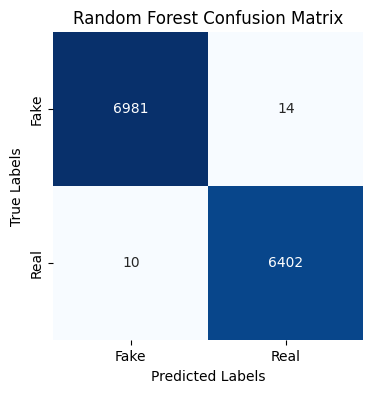

In [ ]:
# Random Forest
rf_model=RandomForestClassifier()
rf_model.fit(X_train_tfidf,y_train)
test_pred=rf_model.predict(X_test_tfidf)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

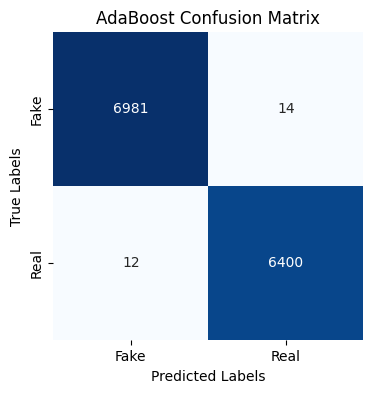

In [ ]:
# AdaBoost
adaboost_model=AdaBoostClassifier()
adaboost_model.fit(X_train_tf,y_train)
test_pred=adaboost_model.predict(X_test_tf)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

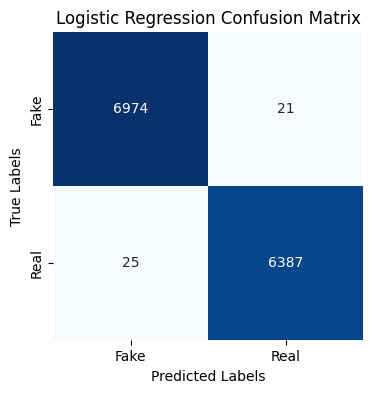

In [ ]:
# Logistic Regression
logistic_model=LogisticRegression()
logistic_model.fit(X_train_count,y_train)
test_pred=logistic_model.predict(X_test_count)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from collections import defaultdict

In [ ]:
unique_pos_tags=set()

def pos_tagging_fn(text:str=''):
  tokens=word_tokenize(text)
  tagged_tokens=nltk.pos_tag(tokens)
  pos_dict=defaultdict(list)
  for word,pos_tag in tagged_tokens:pos_dict[pos_tag].append(word)
  pos_dict=dict(pos_dict)
  for tag1 in pos_dict.keys():unique_pos_tags.add(tag1)
  return pos_dict

In [ ]:
X_test.iloc[0]

'muslim worker democrat sold u intel foreign agent [ video ] judge napolitano say dnc muslim worker : arrested financial crime . tip iceberg . real crime contact , access email every member congress sold found . sell sell . fbi want know . may , serious national security investigation . reporting scandal month heating . main stream medium silent serious national security breach within dnc . fbi investigating given top secret information dnc worker email access everyone congress ! puzzling part entire scandal payment outrageous ! $ 4 million given family associate ! daily caller reported breach security way back february brother fired : three brother managed office information technology member house permanent select committee intelligence lawmaker abruptly relieved duty suspicion accessed congressional computer without permission.brothers abid , imran , jamal awan barred computer network house representative thursday , daily caller news foundation investigative group learned.three memb

In [ ]:
X_train_pos=[pos_tagging_fn(text) for text in X_train]

In [ ]:
X_test_pos=[pos_tagging_fn(text) for text in X_test]

In [ ]:
X_train_pos[0]

{'JJS': ['best'],
 'RB': ['ever'],
 'VBN': ['crooked'],
 'JJ': ['hillary', 'hillary', 'great', 'video'],
 'NN': ['collection',
  'lie',
  'flip',
  'flop',
  'video',
  'clinton',
  'career',
  'thing',
  'share',
  'everyone',
  'know'],
 'NNP': ['[', ']'],
 'IN': ['loooong'],
 'VBG': ['lying', 'twisting'],
 '.': ['.', '!']}

In [ ]:
X_test_pos[0]

{'NN': ['muslim',
  'worker',
  'democrat',
  'intel',
  'agent',
  'video',
  'judge',
  'worker',
  'crime',
  'iceberg',
  'crime',
  'contact',
  'access',
  'email',
  'member',
  'congress',
  'sell',
  'fbi',
  'know',
  'security',
  'investigation',
  'scandal',
  'month',
  'heating',
  'stream',
  'medium',
  'silent',
  'security',
  'breach',
  'dnc',
  'information',
  'dnc',
  'worker',
  'access',
  'everyone',
  'congress',
  'part',
  'scandal',
  'payment',
  'family',
  'associate',
  'caller',
  'security',
  'way',
  'brother',
  'brother',
  'office',
  'information',
  'technology',
  'member',
  'house',
  'committee',
  'intelligence',
  'lawmaker',
  'suspicion',
  'computer',
  'imran',
  'awan',
  'computer',
  'network',
  'house',
  'representative',
  'thursday',
  'caller',
  'news',
  'foundation',
  'group',
  'member',
  'intelligence',
  'panel',
  'member',
  'house',
  'committee',
  'affair',
  'dozen',
  'member',
  'basis',
  'committee',
  'na

In [ ]:
unique_pos_tags

{'#',
 '$',
 "''",
 '(',
 ')',
 ',',
 '.',
 ':',
 'CC',
 'CD',
 'DT',
 'EX',
 'FW',
 'IN',
 'JJ',
 'JJR',
 'JJS',
 'LS',
 'MD',
 'NN',
 'NNP',
 'NNPS',
 'NNS',
 'PDT',
 'POS',
 'PRP',
 'PRP$',
 'RB',
 'RBR',
 'RBS',
 'RP',
 'SYM',
 'TO',
 'UH',
 'VB',
 'VBD',
 'VBG',
 'VBN',
 'VBP',
 'VBZ',
 'WDT',
 'WP',
 'WP$',
 'WRB',
 '``'}

In [ ]:
{
'''CC''': '''Coordinating conjunction''',
'''CD''': '''Cardinal number''',
'''DT''': '''Determiner''',
'''EX''': '''Existential there''',
'''FW''': '''Foreign word''',
'''IN''': '''Preposition or subordinating conjunction''',
'''JJ''': '''Adjective''',
'''JJR''': '''Adjective, comparative''',
'''JJS''': '''Adjective, superlative''',
'''LS''': '''List item marker''',
'''MD''': '''Modal''',
'''NN''': '''Noun, singular or mass''',
'''NNP''': '''Proper noun, singular''',
'''NNPS''': '''Proper noun, plural''',
'''NNS''': '''Noun, plural''',
'''PDT''': '''Predeterminer''',
'''POS''': '''Possessive ending''',
'''PRP''': '''Personal pronoun''',
'''PRP$''': '''Possessive pronoun''',
'''RB''': '''Adverb''',
'''RBR''': '''Adverb, comparative''',
'''RBS''': '''Adverb, superlative''',
'''RP''': '''Particle''',
'''SYM''': '''Symbol''',
'''TO''': '''to''',
'''UH''': '''Interjection''',
'''VB''': '''Verb, base form''',
'''VBD''': '''Verb, past tense''',
'''VBG''': '''Verb, gerund or present participle''',
'''VBN''': '''Verb, past participle''',
'''VBP''': '''Verb, non-3rd person singular present''',
'''VBZ''': '''Verb, 3rd person singular present''',
'''WDT''': '''Wh-determiner''',
'''WP''': '''Wh-pronoun''',
'''WP$''': '''Possessive wh-pronoun''',
'''WRB''': '''Wh-adverb''',
}

In [ ]:
len(X_train_pos),len(X_test_pos)

(31282, 13407)

In [ ]:
def filter_words_by_pos(text,pos_tags):
  filtered_text=' '.join([x for pos_tag,word in text.items() if pos_tag in pos_tags for x in word ])
  return filtered_text

In [ ]:
filter_words_by_pos(text=X_train_pos[0],pos_tags=['JJ'])

'hillary hillary great video'

In [ ]:
pos_tags_to_filter=['NN']
X_train_pos_NN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['JJ']
X_train_pos_JJ=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_JJ=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['VBN']
X_train_pos_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['NN','JJ']
X_train_pos_NN_JJ=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NN_JJ=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['NN','VBN']
X_train_pos_NN_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NN_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['JJ','VBN']
X_train_pos_JJ_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_JJ_VBN=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['NNS']
X_train_pos_NNS=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NNS=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['RB']
X_train_pos_RB=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_RB=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['NN','NNS']
X_train_pos_NN_NNS=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NN_NNS=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
pos_tags_to_filter=['NN','RB']
X_train_pos_NN_RB=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_train_pos]
X_test_pos_NN_RB=[filter_words_by_pos(text,pos_tags_to_filter) for text in X_test_pos]

In [ ]:
print(f'{len(X_test_pos)=},\n,{len(X_test_pos_JJ)=},\n,{len(X_test_pos_JJ_VBN)=},\n,{len(X_test_pos_NN)=},\n,{len(X_test_pos_NNS)=},\n,{len(X_test_pos_NN_JJ)=},\n,{len(X_test_pos_NN_NNS)=},\n,{len(X_test_pos_NN_RB)=},\n,{len(X_test_pos_NN_VBN)=},\n,{len(X_test_pos_RB)=},\n,{len(X_test_pos_VBN)=},\n,{len(X_train_pos)=},\n,{len(X_train_pos_JJ)=},\n,{len(X_train_pos_JJ_VBN)=},\n,{len(X_train_pos_NN)=},\n,{len(X_train_pos_NNS)=},\n,{len(X_train_pos_NN_JJ)=},\n,{len(X_train_pos_NN_NNS)=},\n,{len(X_train_pos_NN_RB)=},\n,{len(X_train_pos_NN_VBN)=},\n,{len(X_train_pos_RB)=},\n,{len(X_train_pos_VBN)=}')

len(X_test_pos)=13407,
,len(X_test_pos_JJ)=13407,
,len(X_test_pos_JJ_VBN)=13407,
,len(X_test_pos_NN)=13407,
,len(X_test_pos_NNS)=13407,
,len(X_test_pos_NN_JJ)=13407,
,len(X_test_pos_NN_NNS)=13407,
,len(X_test_pos_NN_RB)=13407,
,len(X_test_pos_NN_VBN)=13407,
,len(X_test_pos_RB)=13407,
,len(X_test_pos_VBN)=13407,
,len(X_train_pos)=31282,
,len(X_train_pos_JJ)=31282,
,len(X_train_pos_JJ_VBN)=31282,
,len(X_train_pos_NN)=31282,
,len(X_train_pos_NNS)=31282,
,len(X_train_pos_NN_JJ)=31282,
,len(X_train_pos_NN_NNS)=31282,
,len(X_train_pos_NN_RB)=31282,
,len(X_train_pos_NN_VBN)=31282,
,len(X_train_pos_RB)=31282,
,len(X_train_pos_VBN)=31282


In [ ]:
# training different models

logistic_model=LogisticRegression()
passive_aggressive_model=PassiveAggressiveClassifier()
rf_model=RandomForestClassifier()
adaboost_model=AdaBoostClassifier()

model_names=list()
feature_names=list()
filters_names=list()
precs=list()
recal=list()
acc=list()

for model1,model_name in [
  (logistic_model,"Logistic Regression"),
  (passive_aggressive_model,"Passive Aggressive Classifier"),
  (rf_model,"Random Forest"),
  (adaboost_model,"Adaptive Boosting"),
  ]:

  try:

    for x_train_filtered_pos,x_test_filtered_pos,filter_name in [
        (X_train_pos_JJ,X_test_pos_JJ,"Adjective"),
        (X_train_pos_NN,X_test_pos_NN,"Noun - singular or mass"),
        (X_train_pos_NNS,X_test_pos_NNS,"Noun - plural"),
        (X_train_pos_RB,X_test_pos_RB,"Adverb"),
        (X_train_pos_VBN,X_test_pos_VBN,"Verb - past participle"),
        (X_train_pos_JJ_VBN,X_test_pos_JJ_VBN,"Adjective + Verb - past participle"),
        (X_train_pos_NN_JJ,X_test_pos_NN_JJ,"Noun - singular or mass + Adjective"),
        (X_train_pos_NN_NNS,X_test_pos_NN_NNS,"Noun - singular or mass + Noun - plural"),
        (X_train_pos_NN_RB,X_test_pos_NN_RB,"Noun - singular or mass + Adverb"),
        (X_train_pos_NN_VBN,X_test_pos_NN_VBN,"Noun - singular or mass + Verb - past participle"),

    ]:
        for feature_name in [
        "Term Frequency (TF - without IDF)",
        "TF-IDF (Term Frequency & Inverse Document Frequency)",
        "Count Vectorizer (Bag of words method)",
        ]:

          if feature_name=="Term Frequency (TF - without IDF)":
              tf_vectorizer=TfidfVectorizer(use_idf=False,max_features=2000)
              train_case=tf_vectorizer.fit_transform(x_train_filtered_pos)
              test_case=tf_vectorizer.transform(x_test_filtered_pos)
          elif feature_name=="TF-IDF (Term Frequency & Inverse Document Frequency)":
              tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=2000)
              train_case=tfidf_vectorizer.fit_transform(x_train_filtered_pos)
              test_case=tfidf_vectorizer.transform(x_test_filtered_pos)
          elif feature_name=="Count Vectorizer (Bag of words method)":
              count_vectorizer=CountVectorizer(max_features=2000)
              train_case=count_vectorizer.fit_transform(x_train_filtered_pos)
              test_case=count_vectorizer.transform(x_test_filtered_pos)
          else:
              print('Invalid Feature')

          print(model_name,feature_name,filter_name)
          model1.fit(train_case,y_train)
          p,r,a=get_evaluation_metrics(true_pred=y_test,test_pred=model1.predict(test_case))
          model_names.append(model_name)
          feature_names.append(feature_name)
          filters_names.append(filter_name)
          precs.append(p)
          recal.append(r)
          acc.append(a)
  except Exception as e:
    print(model_name,e)

Logistic Regression Term Frequency (TF - without IDF) Adjective
Logistic Regression TF-IDF (Term Frequency & Inverse Document Frequency) Adjective
Logistic Regression Count Vectorizer (Bag of words method) Adjective
Logistic Regression Term Frequency (TF - without IDF) Noun - singular or mass
Logistic Regression TF-IDF (Term Frequency & Inverse Document Frequency) Noun - singular or mass
Logistic Regression Count Vectorizer (Bag of words method) Noun - singular or mass
Logistic Regression Term Frequency (TF - without IDF) Noun - plural
Logistic Regression TF-IDF (Term Frequency & Inverse Document Frequency) Noun - plural
Logistic Regression Count Vectorizer (Bag of words method) Noun - plural
Logistic Regression Term Frequency (TF - without IDF) Adverb
Logistic Regression TF-IDF (Term Frequency & Inverse Document Frequency) Adverb
Logistic Regression Count Vectorizer (Bag of words method) Adverb
Logistic Regression Term Frequency (TF - without IDF) Verb - past participle
Logistic Regre

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          "ML Model":model_names,
          "Feature":feature_names,
          "Filter":filters_names,
          "Precision":precs,
          "Recall":recal,
          "Accuracy":acc,
          }
    ).sort_values(by=['Precision','Recall','Accuracy'],ascending=[False,False,False]),headers="keys",tablefmt="rounded_grid"))

╭─────┬───────────────────────────────┬──────────────────────────────────────────────────────┬──────────────────────────────────────────────────┬─────────────┬──────────┬────────────╮
│     │ ML Model                      │ Feature                                              │ Filter                                           │   Precision │   Recall │   Accuracy │
├─────┼───────────────────────────────┼──────────────────────────────────────────────────────┼──────────────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│  83 │ Random Forest                 │ Count Vectorizer (Bag of words method)               │ Noun - singular or mass + Noun - plural          │    0.996417 │ 0.997505 │   0.997091 │
├─────┼───────────────────────────────┼──────────────────────────────────────────────────────┼──────────────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│  82 │ Random Forest                 │ TF-IDF (Term Frequency & Inverse Documen

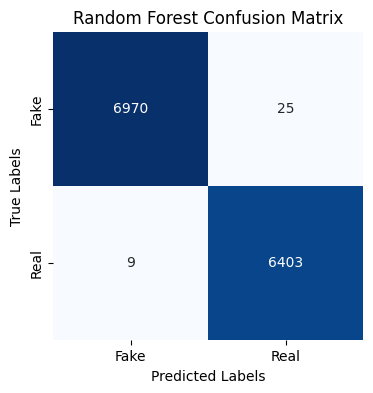

In [ ]:
# Random Forest
rf_model=RandomForestClassifier()
count_vectorizer=CountVectorizer(max_features=2000)
train_case=count_vectorizer.fit_transform(X_train_pos_NN_NNS)
test_case=count_vectorizer.transform(X_test_pos_NN_NNS)
rf_model.fit(train_case,y_train)
test_pred=rf_model.predict(test_case)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

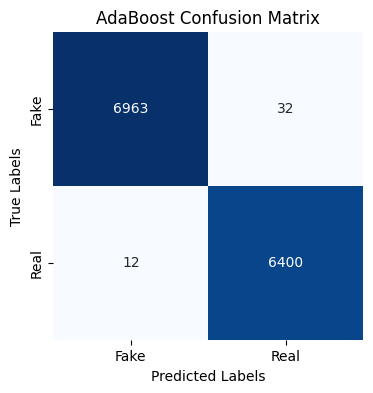

In [ ]:
# AdaBoost
adaboost_model=AdaBoostClassifier()
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=2000)
train_case=tfidf_vectorizer.fit_transform(X_train_pos_NN_NNS)
test_case=tfidf_vectorizer.transform(X_test_pos_NN_NNS)
adaboost_model.fit(train_case,y_train)
test_pred=adaboost_model.predict(test_case)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

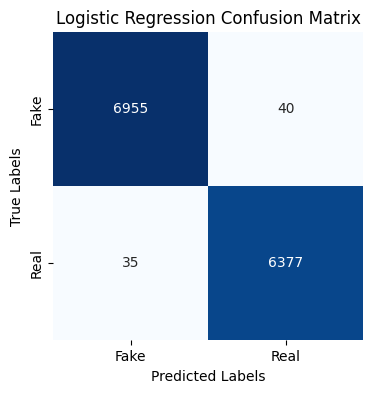

In [ ]:
# Logistic Regression
logistic_model=LogisticRegression()
count_vectorizer=CountVectorizer(max_features=2000)
train_case=count_vectorizer.fit_transform(X_train_pos_NN_NNS)
test_case=count_vectorizer.transform(X_test_pos_NN_NNS)
logistic_model.fit(train_case,y_train)
test_pred=logistic_model.predict(test_case)
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Fake','Real'],yticklabels=['Fake','Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()